# The Sparks Foundation: GRIP - The Data Science and Business Analytics Internship

Task-1 : Exploratory Data Analysis- Retail

We need to perform an EDA on dataset "Samplesuperstore" and try to find out the weak areas where we can work to make more 
profits. 


Dataset URL: https://bit.ly/3i4rbWl

# Author: HEMANT SHARMA

# 1]. Filtering out the warnings and Import all the necessary Libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2].  Load the data by reading SampleSuperstore.csv file

In [31]:
Superstore_data=pd.read_csv('C:/Users/Hemant Sharma/Downloads/SampleSuperstore.csv')
Superstore_data.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# 3]. Inspect the Dataframes

In [3]:
Superstore_data.shape # No. of rows are 9994 and No of columns are 13 in this dataset

(9994, 13)

In [4]:
Superstore_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
Superstore_data.describe() #Check the summary for the numeric columns 
# for including all columns, we can use describe(include = "all")

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Finding all the column names inside the dataset and remove all duplicates

In [6]:
Superstore_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Check the dataset for duplicate and dropping element

In [7]:
Superstore_data.duplicated().sum()

17

In [8]:
Superstore_data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# 4]. DATA CLEANING

4.1) Null values information in dataset

In [9]:
Superstore_data.isnull().head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


4.2) Null percentage information in dataset

In [10]:
null_percentage = Superstore_data.isnull().sum()/len(Superstore_data)*100
null_percentage.sort_values(ascending = False).head(60)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

As we know from the above analysis there are no null values are present in the dataset so we will consider 
full dataset for our analysis

4.3) Outliers Treatment

Now we will check the distribution of one set of continous variables.

In [11]:
Check_distribution= round(Superstore_data[['Sales', 'Profit']].describe(), 2)
Check_distribution

,Sales,Profit
count,9994.00,9994.00
mean,229.86,28.66
std,623.25,234.26
min,0.44,-6599.98
25%,17.28,1.73
50%,54.49,8.67
75%,209.94,29.36
max,22638.48,8399.98


 From the above analysis we can conclude that the Sales percentile value is increasing gradually as like Profit.
 so there is not any Outliers.

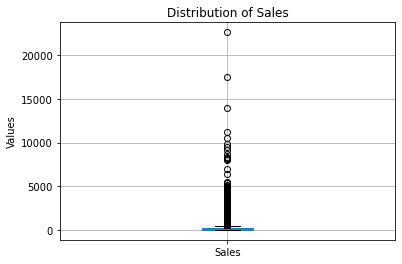

In [12]:
f1 = Superstore_data.boxplot(column='Sales')
plt.title('Distribution of Sales')
f1.set_ylabel('Values')
plt.show()

# 5.] EDA

In [13]:
Superstore_data.nunique() # number of distinct observations  

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

correlation of dataset

In [14]:
Superstore_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [15]:
# profit and sales have negative correlation with Discount.

covariance of dataset

In [16]:
Superstore_data.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


Series containing counts of unique values

In [17]:
Superstore_data.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288      2
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370      2
Standard Class  Consumer     United States  San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West     Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West     Office Supplies  Labels        41.400   4         0.0        19.8720    

Deleting the Variable

In [18]:
col=['Postal Code']
df1=Superstore_data.drop(columns=col,axis=1)

# Visualization of the data set

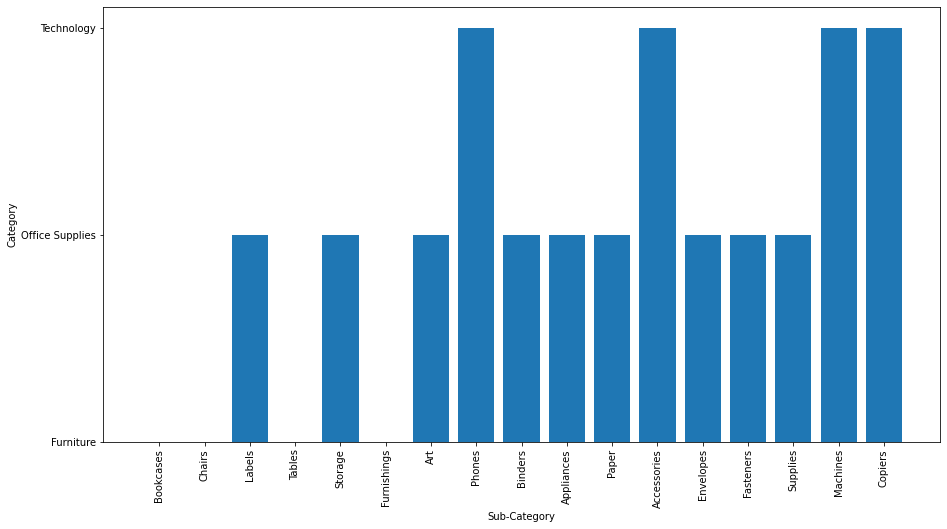

In [19]:
plt.figure(figsize=(15,8))
plt.bar('Sub-Category','Category', data=Superstore_data)
plt.xticks(rotation = 90)
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()


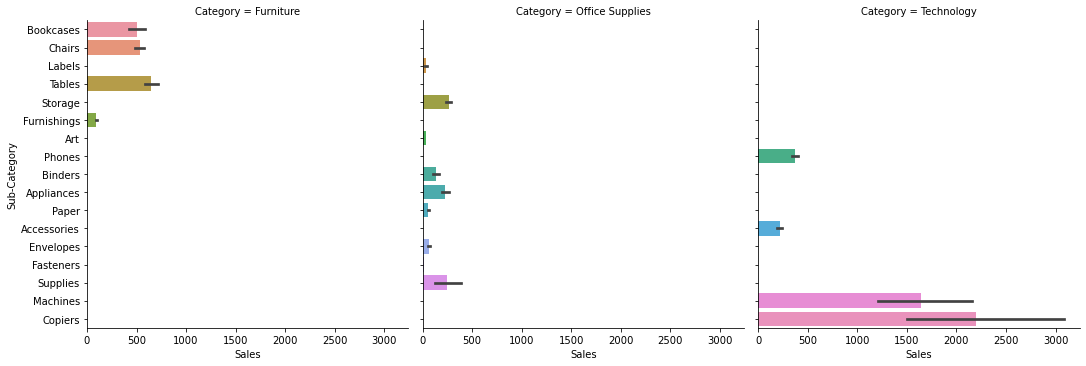

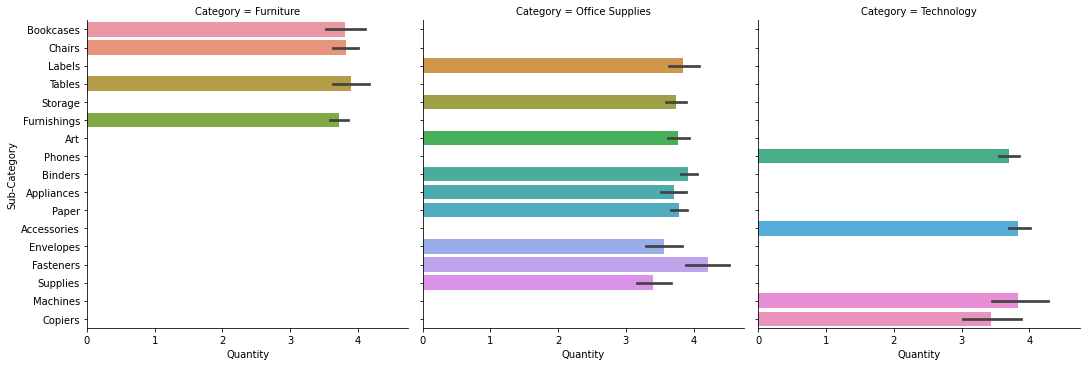

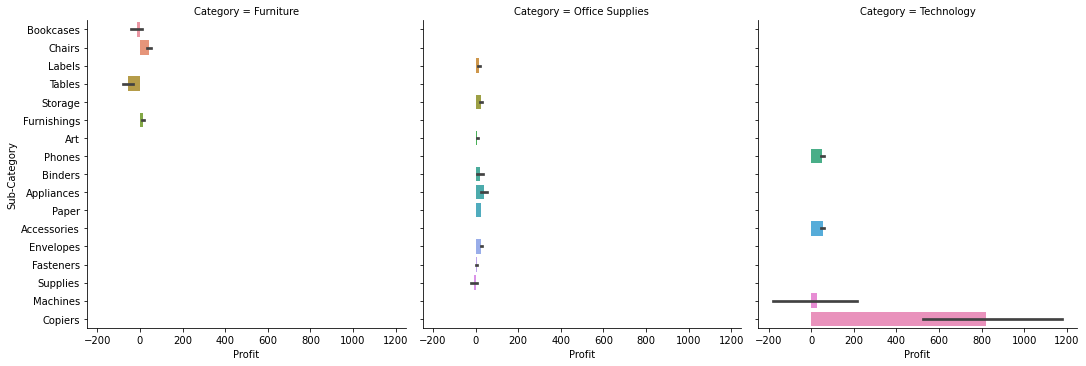

In [20]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=Superstore_data,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=Superstore_data,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=Superstore_data,
                kind='bar')

From these graphs, we can conclude that

1.) In technology category, Sales are more than other two category.

2.)In technology category, Copiers and Machines are sold the most.

3.)Quantity of products are almost sold in equal amount in each category.

4.)In Furniture category, Bookcases and Tables are incurring a lose.

5.)In Office Supplies category, there is a very minimal profit in all sub-categories.

6.)In technology category, Copiers provide the most profit among all others.

# HEATMAP OF DATASET

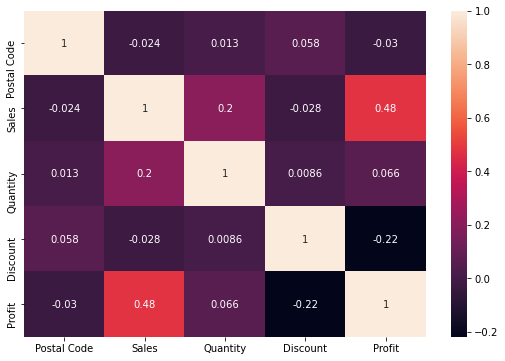

In [23]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(Superstore_data.corr(), annot= True)
plt.show()

In [24]:
# from above analysis we can say that profit have negative correlation with discount and positive with sales

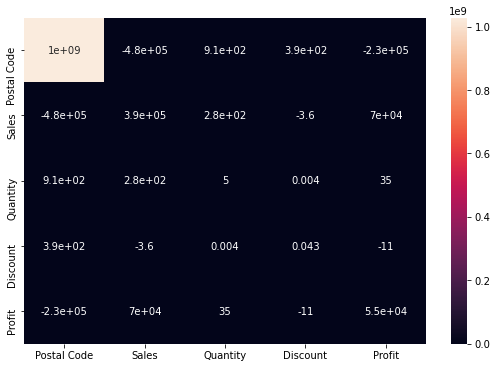

In [25]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(Superstore_data.cov(), annot= True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

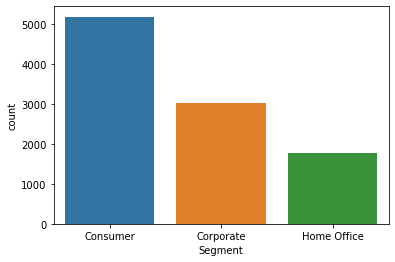

In [26]:
sns.countplot(x=Superstore_data['Segment'])

In [27]:
# from above analysis we can say consumer is the most targeted segment.

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

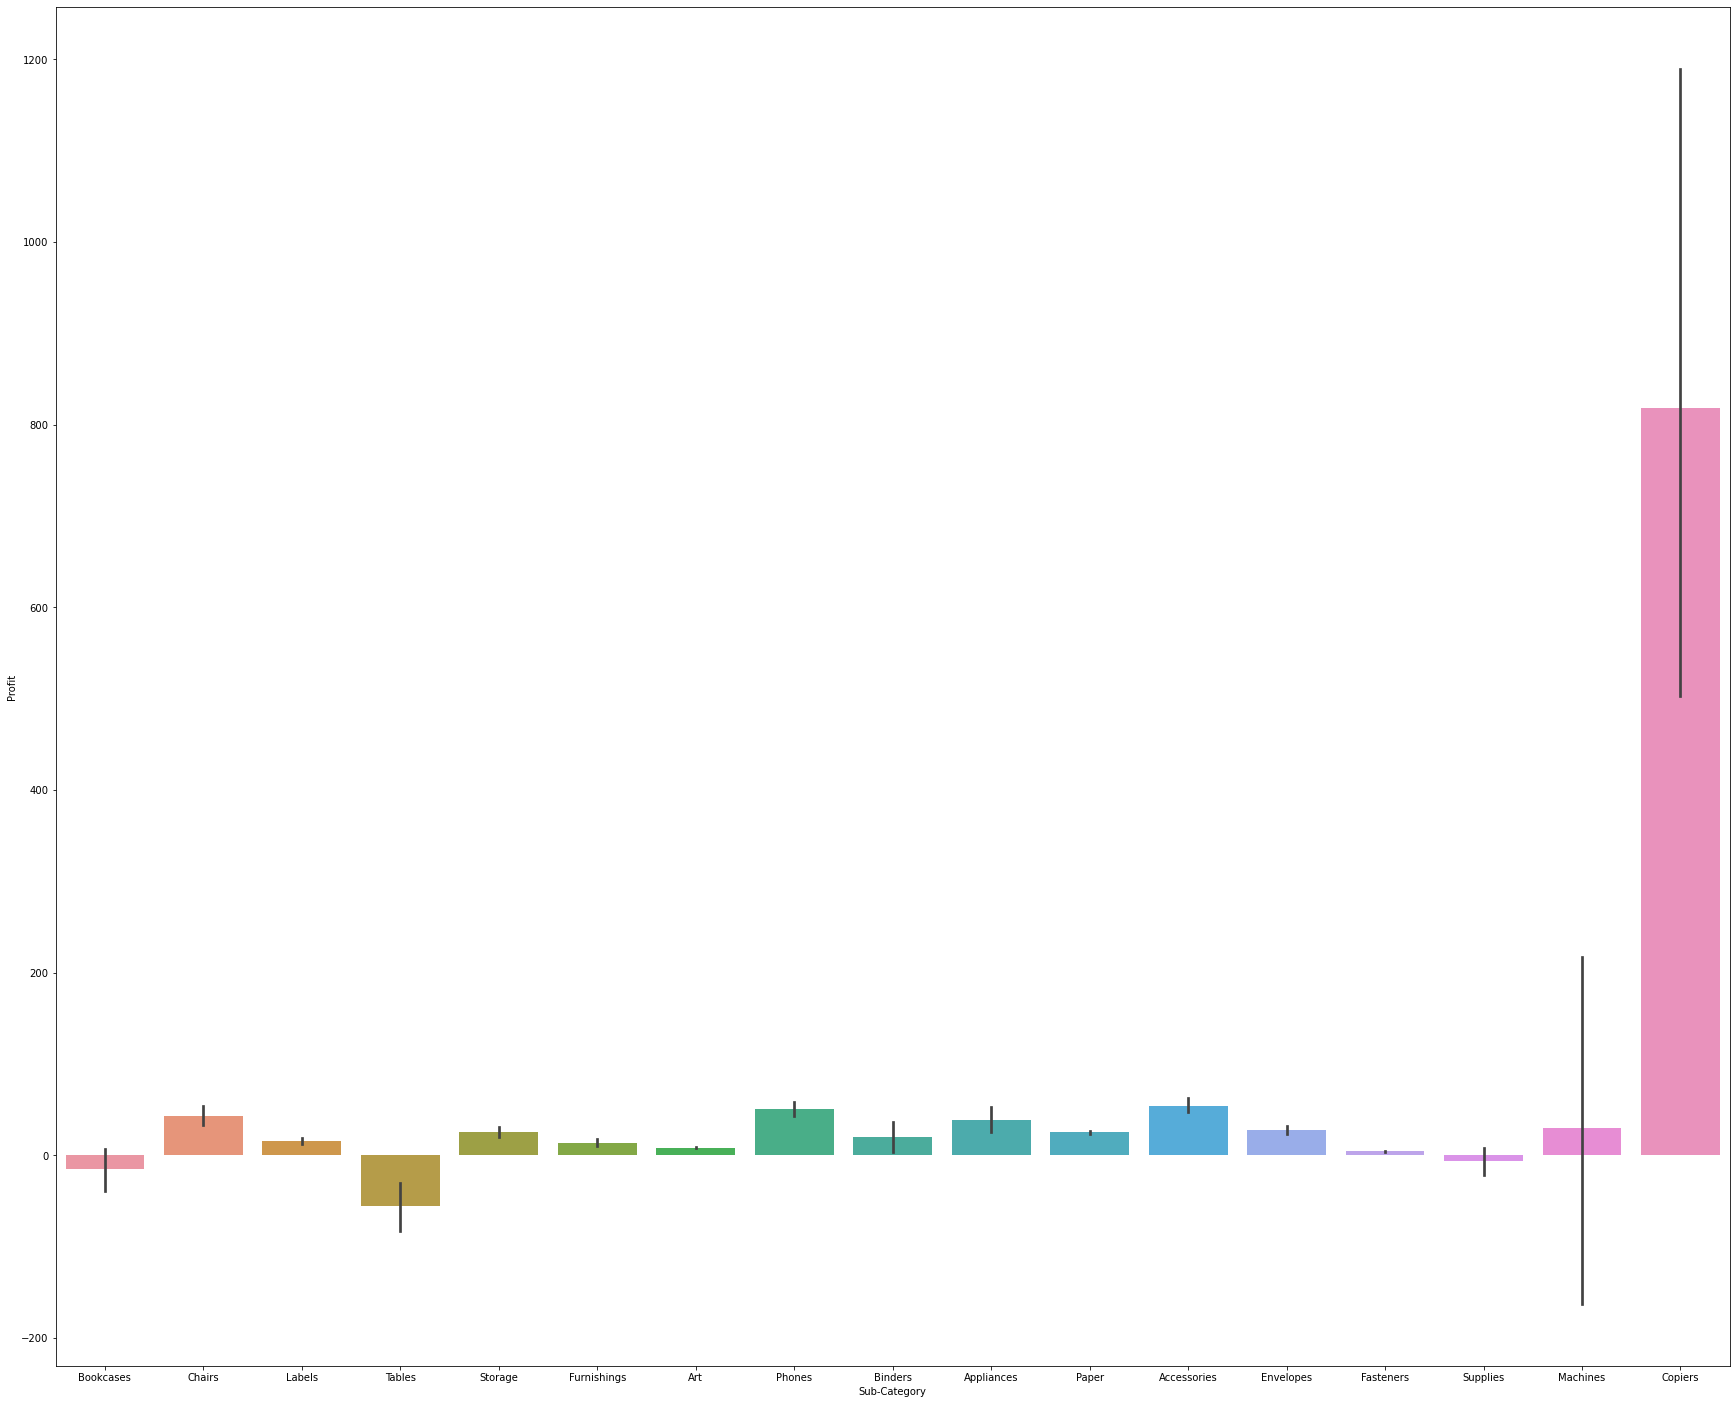

In [30]:
plt.figure(figsize=(30,25))
sns.barplot(x=Superstore_data['Sub-Category'], y=Superstore_data['Profit'])

In [32]:
# copiers sub category have maximum profit shown above.

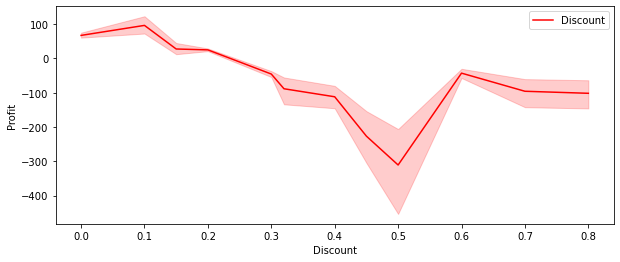

In [33]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = Superstore_data, color = 'r', label= 'Discount')
plt.legend()

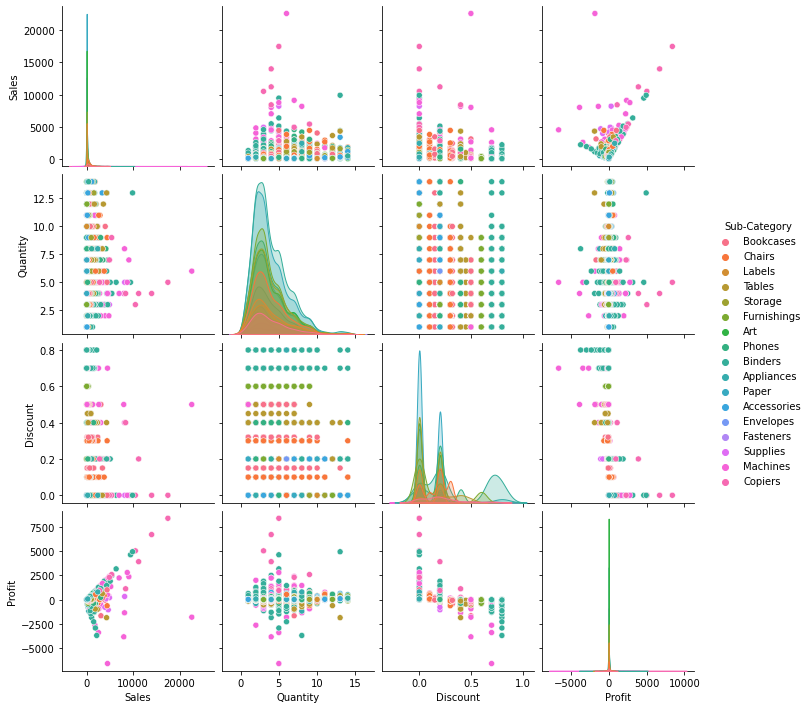

In [34]:
figsize=(15,10)
sns.pairplot(df1,hue='Sub-Category')

# SCATTER PLOT

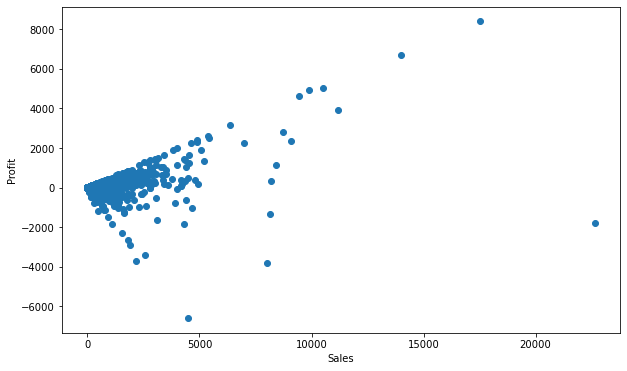

In [35]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(Superstore_data["Sales"] , Superstore_data["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# Distribution Plot

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


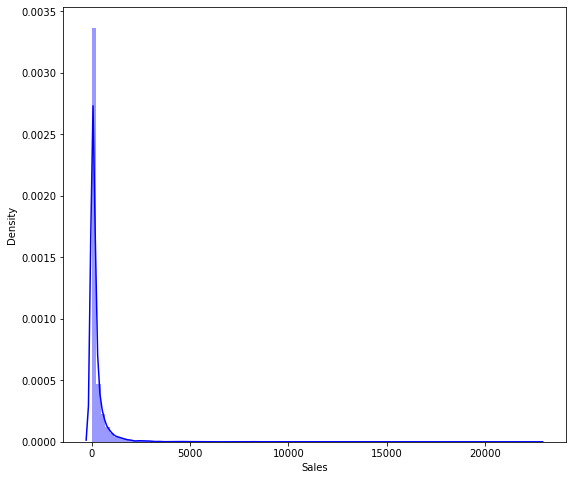

In [36]:
print(Superstore_data['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(Superstore_data['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

# THANK YOU